<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/pandas(%EA%B8%B0%EB%B3%B8_%EB%AC%B8%EB%B2%95_%EC%97%B0%EC%8A%B5_%EB%B0%8F_titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0_median%EA%B0%92%EC%9C%BC%EB%A1%9C_missing_data_%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving LEC_01_data.csv to LEC_01_data.csv


In [0]:
import pandas as pd
df = pd.read_csv('./LEC_01_data.csv')
df

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
3,Sato,Japan,40,Chef
4,Lee,Korea,36,Professor
5,Smith,USA,55,CEO
6,David,USA,48,Banker


In [0]:
type(df) #데이터프레임 : 엑셀 시트와 같은 테이블 형태의 datatype , 2차원 배열을 나타냄

pandas.core.frame.DataFrame

In [0]:
type(df.Name) #시리즈 : 데이터프레임의 한개의 열

pandas.core.series.Series

In [0]:
# 열 추출하기 
df_job = df['Job']
df_job

0      Student
1       Lawyer
2    Developer
3         Chef
4    Professor
5          CEO
6       Banker
Name: Job, dtype: object

In [0]:
df_country_job = df[['Country','Job']] #열이 두개 이상인 경우 , list 타입으로 기술해야함.
df_country_job

,Country,Job
0,USA,Student
1,France,Lawyer
2,Korea,Developer
3,Japan,Chef
4,Korea,Professor
5,USA,CEO
6,USA,Banker


In [0]:
#행 데이터 추출하기
df_1st_row = df.loc[0]
df_1st_row

Name          John
Country        USA
Age             31
Job        Student
Name: 0, dtype: object

In [0]:
df_1st_4th_row = df.loc[[0,3]]
df_1st_4th_row

,Name,Country,Age,Job
0,John,USA,31,Student
3,Sato,Japan,40,Chef


In [0]:
df_row = df.loc[0:3]
df_row

,Name,Country,Age,Job
0,John,USA,31,Student
1,Sabre,France,33,Lawyer
2,Kim,Korea,28,Developer
3,Sato,Japan,40,Chef


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission.csv


In [0]:

import pandas as pd
import numpy as np
train = np.loadtxt('./train.csv',delimiter=',',dtype=np.float32)

ValueError: ignored

In [0]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
gender_sub = pd.read_csv('./gender_submission.csv')
print(type(train))
print(type(test))
print(type(gender_sub))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [0]:
train.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [0]:
test.values

array([[892, 3, 'Kelly, Mr. James', ..., 7.8292, nan, 'Q'],
       [893, 3, 'Wilkes, Mrs. James (Ellen Needs)', ..., 7.0, nan, 'S'],
       [894, 2, 'Myles, Mr. Thomas Francis', ..., 9.6875, nan, 'Q'],
       ...,
       [1307, 3, 'Saether, Mr. Simon Sivertsen', ..., 7.25, nan, 'S'],
       [1308, 3, 'Ware, Mr. Frederick', ..., 8.05, nan, 'S'],
       [1309, 3, 'Peter, Master. Michael J', ..., 22.3583, nan, 'C']],
      dtype=object)

In [0]:
type(train['PassengerId'])

pandas.core.series.Series

In [0]:
type(test['PassengerId'])

pandas.core.series.Series

In [0]:
type(gender_sub['PassengerId'])

pandas.core.series.Series

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
type(gender_sub)

pandas.core.frame.DataFrame

In [0]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
test['Survived'] = gender_sub['Survived'] 
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [0]:
train['Cabin'].fillna('aaa',inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,aaa,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,aaa,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,aaa,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,aaa,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,aaa,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
median = train['Age'].median()
median

28.0

In [0]:
mean = train['Age'].mean()
mean

29.69911764705882

In [0]:
train['Age'].fillna(median, inplace=True)
train['Embarked'].fillna('aaa', inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [0]:
test['PassengerId'].fillna('aaa', inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Cabin'].fillna('aaa', inplace=True)
test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Survived        0
dtype: int64

In [0]:
print(test['Age'].median())
print(test['Age'].mean())

27.0
30.272590361445783


In [0]:
test_median = test['Age'].median()
test_mean = test['Age'].mean()

In [0]:
test.fillna(median, inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [0]:
test = test[['Survived',	'Pclass',	'Sex','Age','SibSp','Parch','Fare']]
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,28.0,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,28.0,0,0,8.0500


In [0]:
train = train[['Survived',	'Pclass',	'Sex','Age','SibSp','Parch','Fare']]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [0]:
train_csv_data = train.values
test_csv_data = test.values
print(type(train_csv_data))
print(type(test_csv_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
for i in range(len(train_csv_data)):
    
    if train_csv_data[i, 2] == 'male':
        
        train_csv_data[i, 2] = 1.0
    
    else:
        
        train_csv_data[i, 2] = 0.0
        
# test_csv_data 에서 male -> 1, female -> 0
for i in range(len(test_csv_data)):
    
    if test_csv_data[i, 2] == 'male':
        
        test_csv_data[i, 2] = 1.0
    
    else:
        
        test_csv_data[i, 2] = 0.0

In [0]:
training_input_data = train_csv_data[ : , 1: ].astype('float32')  # Pclass, Sex, Age, SibSp, Parch, Fare

training_target_data = train_csv_data[ :, [0] ].astype('float32')  # Survived

print('training_input_data.shape = ', training_input_data.shape, ', training_target_data.shape = ', training_target_data.shape)



training_input_data.shape =  (891, 6) , training_target_data.shape =  (891, 1)


In [0]:
test_input_data = test_csv_data[ : , 1: ].astype('float32')  # Pclass, Sex, Age, SibSp, Parch, Fare

test_target_data = test_csv_data[ :, [0] ].astype('float32')  # Survived

print('test_input_data.shape = ', test_input_data.shape, ', test_target_data.shape = ', test_target_data.shape)



test_input_data.shape =  (418, 6) , test_target_data.shape =  (418, 1)


In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:

# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [0]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class Kaggle_Titanic:
    
    def __init__(self, name, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 =  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
        # name 초기화
        self.name = name
        
        print(self.name, " object is created !!!")
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        y = self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(y + delta) + (1-self.target_data)*np.log((1 - y)+delta ) )    
    
    # accuracy method
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        temp_list = []
        
        for index in range(len(input_data)):
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            # dtype=np.float32 해주지 않으면 sigmoid 에서 Numpy AttributeError: 'float' object has no attribute 'exp' 발생함
            # 해결방법 소스
            # https://stackoverflow.com/questions/18557337/numpy-attributeerror-float-object-has-no-attribute-exp/18568056
            (real_val, predicted_num) = self.predict(np.array(input_data[index], dtype=np.float32, ndmin=2)) 
            
            if predicted_num == target_data[index]:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(target_data[index])
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        accuracy_result = len(matched_list) / len(input_data)
            
        #print("Accuracy => ", accuracy_result)
            
        return accuracy_result, index_label_prediction_list
    
    # train method
    def train(self, input_data, target_data):   
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨     
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        y = A3 = sigmoid(Z3)
        
        if y >= 0.5:
            predicted_num = 1
        else:
            predicted_num = 0
    
        return y, predicted_num

In [0]:
#hyper-parameter
i_nodes = training_input_data.shape[1]    # input nodes 개수
h1_nodes = 50  # hidden nodes 개수, 20개, 1e-4 OK
o_nodes = 1    # output nodes 개수

lr = 1e-4     # learning rate

epochs = 200   # 반복횟수

# 손실함수 값을 저장할 list 생성
loss_val_list = []

train_acc_list = []
validation_acc_list = []

# Kaggle_Titanic 객체 생성
titanic_obj = Kaggle_Titanic('Titanic', i_nodes, h1_nodes, o_nodes, lr)

print("Neural Network Learning using BackPropagation...")


start_time = datetime.now()

for i in range(epochs):
    
    for index in range(len(training_input_data)):
        
        input_data = training_input_data[index]
        target_data = training_target_data[index]
        
        # dtype=np.float32 해주지 않으면 sigmoid 에서 Numpy AttributeError: 'float' object has no attribute 'exp' 발생함
        # 해결방법 소스
        # https://stackoverflow.com/questions/18557337/numpy-attributeerror-float-object-has-no-attribute-exp/18568056
        titanic_obj.train( np.array(input_data, dtype=np.float32, ndmin=2), np.array([target_data], dtype=np.float32, ndmin=2) )  # 행렬로 입력
  
    
    cur_loss_val = titanic_obj.loss_val()
    print("epochs = ", i+1, "loss value = ", cur_loss_val)    
    
    (train_accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(training_input_data, training_target_data)
    (validation_accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)
    
    train_acc_list.append(train_accuracy_val)
    validation_acc_list.append(validation_accuracy_val)
    
    
    # 손실함수 값 저장
    loss_val_list.append(cur_loss_val) 
        

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

Titanic  object is created !!!
Neural Network Learning using BackPropagation...
epochs =  1 loss value =  0.5616373569186638


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


epochs =  2 loss value =  0.5244702439854247
epochs =  3 loss value =  0.49396051859655327
epochs =  4 loss value =  0.4686993039485902
epochs =  5 loss value =  0.44760535719887695
epochs =  6 loss value =  0.42984734417831066
epochs =  7 loss value =  0.4147826318891964
epochs =  8 loss value =  0.40191077460037333
epochs =  9 loss value =  0.390838771717258
epochs =  10 loss value =  0.3812552888851357
epochs =  11 loss value =  0.37291153232596386
epochs =  12 loss value =  0.3656070048738039
epochs =  13 loss value =  0.3591788315917553
epochs =  14 loss value =  0.3534936998061438
epochs =  15 loss value =  0.3484417233916914
epochs =  16 loss value =  0.34393173307907343
epochs =  17 loss value =  0.33988763173981595
epochs =  18 loss value =  0.33624555121232846
epochs =  19 loss value =  0.3329516168981338
epochs =  20 loss value =  0.3299601764800246
epochs =  21 loss value =  0.3272323855217828
epochs =  22 loss value =  0.3247350693890009
epochs =  23 loss value =  0.322439

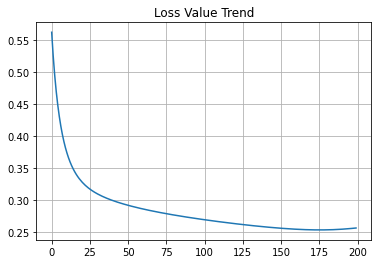

In [0]:
plt.title('Loss Value Trend')
plt.grid()
plt.plot(loss_val_list)
plt.show()

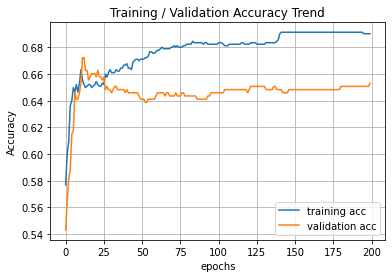

In [0]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_acc_list)
plt.plot(validation_acc_list)
plt.legend(['training acc', 'validation acc'])

plt.show()

In [0]:
(accuracy_val, index_label_prediction_list) = titanic_obj.accuracy(test_input_data, test_target_data)

print('Accuracy = ', 100*np.round(accuracy_val, 3), ' %')

Accuracy =  65.3  %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
# 디카프리오, 윈슬렛 예측
dicaprio = np.array([3., 1., 19., 0., 0.,   5.]).reshape(1,6)    # Pclass, Sex, Age, SibSp, Parch, Fare
winslet  = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)    # Pclass, Sex, Age, SibSp, Parch, Fare

(d_probability, alive_or_dead) = titanic_obj.predict(dicaprio)

print(d_probability, alive_or_dead)

(w_probability, alive_or_dead) = titanic_obj.predict(winslet)

print(w_probability, alive_or_dead)

[[0.21919082]] 0
[[0.62997508]] 1
